Let $S_n, n\geq0$ denote the price of a specified stock option at the end of the day n. A common model is to suppose that:

$S_n = S_0 exp\{X_1 + ... + X_n\}, n\geq0$

where $X_1, ..., X_n$ are a sequence of independent normal random variables, each with mean $\mu$, and variance $\sigma^{2}$

This model, which supposes that each day's percentage increase in price over the previous day has common distribution, is called the "lognormal random walk model".

Here we are solving the Stochastic Differential Equation:

$dS_n = \mu S_n dt + \sigma S_n dB_n$ with $S_0 = s_0 > 0$, where $B_n$ is a geometric Browninan Motion.

Whose Exact solution is given by:

$S_n = s_0exp\bigl((\mu - \frac{1}{2} \sigma ^{2} )t + \sigma B_n \bigr)$, where $B_n$ is a geometric Browninan Motion.

* Note, we use a Standard Normal Distribution to simulate the Brownian Motion.

In [9]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
# Variables
S0 = 10 # Market price
r = .04 # Interest free rate.
sigma = .2 # Volatility
T = .5 
N = 20
delta_t = T/N

In [3]:
def std_normal(n):
    """
    Returns a numpy array containing n values from a normal distribution.
    """
    result = []
    for i in range(0, int(n/2)):
        two = two_normals()
        result.append(two[0])
        result.append(two[1])
    return result

def two_normals():
    """
    Polar method for generating a standard normal Random Variable
    -------------------------------------------------------------
    Returns a pair of numbers that are distributed according to a
    Standard Normal Distribution.
    """
    while(True):
        # Generate V1 and V2 until we obtain one 
        # that is contained in the circle  of radius 1
        unif1 = np.random.uniform(0,1)
        unif2 = np.random.uniform(0,1)
        V1 = 2*unif1 - 1 # uniform on (-1,1)
        V2 = 2*unif2 - 1 # uniform on (-1,1)
        S = V1**2 + V2**2
        if (S<1): break
    X = np.sqrt( (-2*np.log(S))/S ) * V1
    Y = np.sqrt( (-2*np.log(S))/S ) * V2
    return (X,Y)

In [4]:
rnd_normals = std_normal(N)

In [8]:
Sh = [] # Simulated Price
S = [] # Real Price
for rand in rnd_normals:
    
    # Discrete version of the SDE:
    Ph = S0*( 1 + r*delta_t + sigma*rand*np.sqrt(delta_t) ) 
    # Formula for the exact solution of the SDE:
    P = S0*np.exp( (r-.5*sigma**2)*delta_t + sigma*rand*np.sqrt(delta_t) )
    
    Sh.append(Ph)
    S.append(P)

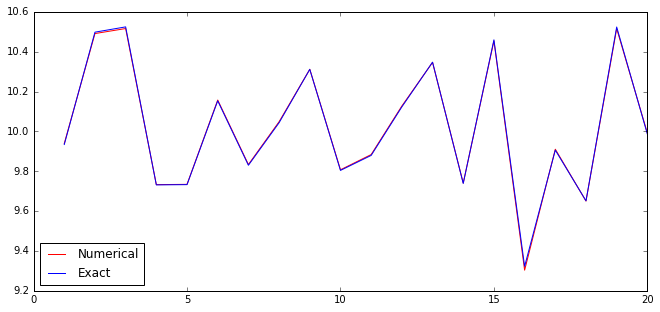

In [22]:
time = np.arange(1,N+1)
fig = pt.figure(figsize=(11,5))
plt = fig.add_subplot(111)
plt.plot(time, Sh, 'r-', label = 'Numerical')
plt.plot(time, S, 'b-', label = 'Exact')
plt.legend(loc='lower left')